# Lab 126

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import os,sys,inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
import edhec_risk_kit as erk

import ipywidgets as widgets
from IPython.display import display

In [3]:
erk.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [5]:
erk.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

In [6]:
erk.bond_price(20, 1000, 0.05, 2, 0.05)

1000.0000000000023

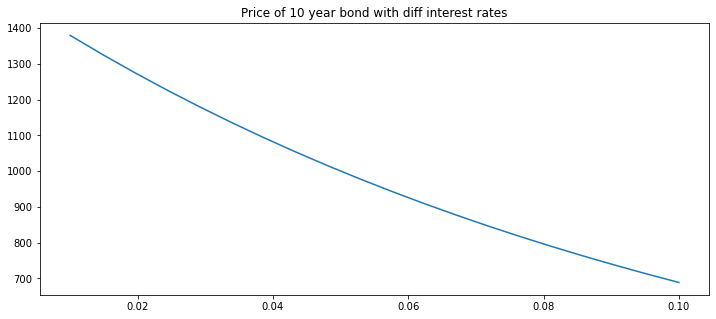

In [13]:
rates = np.linspace(.01, .10, num=20)
prices = [erk.bond_price(10, 1000, .05, 2, rate) for rate in rates]
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10 year bond with diff interest rates", legend=False, figsize=(12,5))

In [14]:
cf = erk.bond_cash_flows(3, 1000, 0.06, 2)

In [15]:
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [16]:
discounts = erk.discount(cf.index, .06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [17]:
dcf = discounts*cf # discount cash flow
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [20]:
weights = dcf/dcf.sum() 
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

## The Macaulay duration

In [22]:
(cf.index*weights).sum()

5.579707187194534

In [23]:
erk.macaulay_duration(erk.bond_cash_flows(3, 1000, .06, 2), .06/2)

5.579707187194534

## Duration Matching

In [24]:
liabilities = pd.Series(data=[100000, 100000], index=[10, 12])
erk.macaulay_duration(liabilities, .04)

10.960799385088393

In [25]:
md_10 = erk.macaulay_duration(erk.bond_cash_flows(10, 1000, .05, 1), .04)
md_20 = erk.macaulay_duration(erk.bond_cash_flows(20, 1000, .05, 1), .04)

In [26]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

In [27]:
short_bond = erk.bond_cash_flows(10, 1000,  .05, 1)
long_bond = erk.bond_cash_flows(20, 1000,  .05, 1)
weight_short_bond = erk.match_durations(liabilities, short_bond, long_bond, .04)

In [28]:
weight_short_bond

0.48263092069478974

In [31]:
p_short = erk.bond_price(10, 1000, .05, 1, .04)
p_long = erk.bond_price(20, 1000, .05, 1, .04)
a_0 = 130000
p_flows = pd.concat([
    a_0*weight_short_bond*short_bond/p_short, 
    a_0*(1 - weight_short_bond)*long_bond/p_long
    ])
erk.macaulay_duration(p_flows, .04)

10.960799385088393

In [35]:
cfr = erk.funding_ratio(p_flows, liabilities, .04)

In [36]:
cfr

0.9998760012192478

In [39]:
rates = np.linspace(0, .1, 20)
lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short
fr_change = pd.DataFrame({
    "LongBond": [erk.funding_ratio(lb_assets, liabilities, r) for r in rates],
    "ShortBond": [erk.funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Match Bonds": [erk.funding_ratio(p_flows, liabilities, r) for r in rates]
}, index=rates)

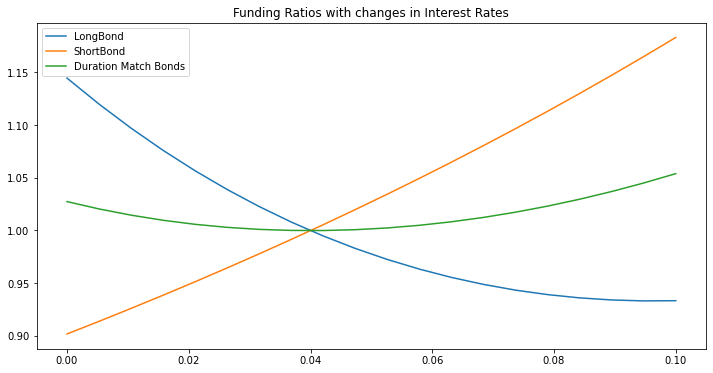

In [40]:
fr_change.plot(title="Funding Ratios with changes in Interest Rates", figsize=(12, 6))